In [3]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


tetrapart_model (generic function with 1 method)

In [4]:
using JLD2, CairoMakie, GLMakie

In [5]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000

8000

In [6]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [7]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
len = 350
map_dim = " $(len)x$(len) "
name = " tau_D article2 space with chaos and hom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -1.58, -1.78, length = len );
U0range = range(0.3, 0.264, length = len);

In [ ]:
Λs, Λsc

In [8]:
stepI0 = -0.0005730659025787732;
stepU0 = -0.00010315186246417918;
I0rangec = range( -1.58, -1.78, step = stepI0 );
U0rangec = range(0.2682292263610315, 0.264, step = stepU0);
lenI0, lenU0 = length(I0rangec), length(U0rangec);

map_dimc = " $(lenI0)x$(lenU0) "
namec = " tau_D article2 space with chaos and hom continue"
formatc = ".jld2"
namefile_LSEc = "LSE" * map_dimc * namec * formatc
namefile_u0sc = "u0s" * map_dimc * namec * formatc

Λsc = load(namefile_LSEc)
Λsc = Λsc["Λs"]
u0sc = load(namefile_u0sc)
u0sc = u0sc["u0s"];

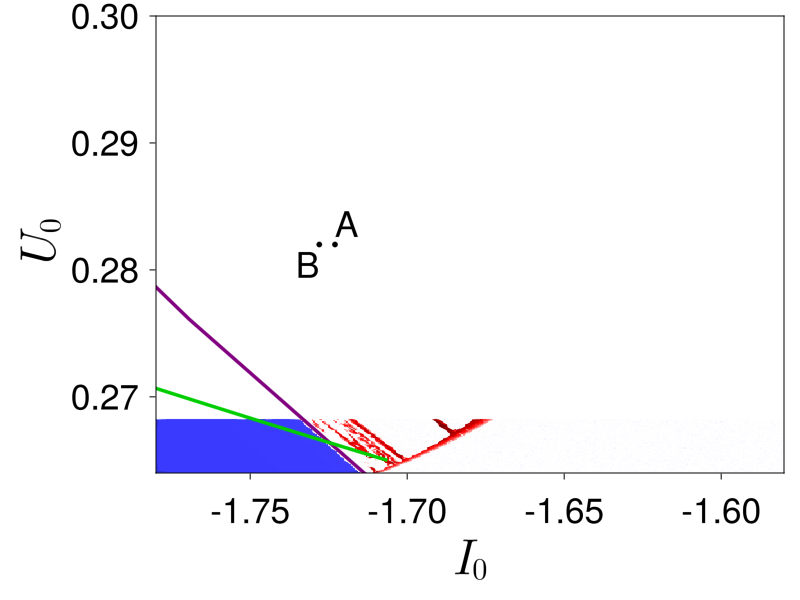

In [9]:
ticksize = 35
tickpad = 10.0
textsize = 25
mksize = 12
lw = 3.5
index = 1
absmax = maximum(abs.(Λs[:, :, index]))
mn, mx =  -absmax, absmax

f = Figure()

I0st, I0ed = 1, 350
U0st, U0ed = 1, 350

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

absmaxc = maximum(abs.(Λsc[:, :, index]));
mnc, mxc =  -absmaxc, absmaxc;
hmc = heatmap!(ax, I0rangec, U0rangec, Λsc[:, :, index], colormap = :seismic, colorrange = (mnc, mxc));

lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)

colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], color = colorhom, linewidth = lw)

scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1182463005483, 0.161724273501619, text = "cusp", fontsize = textsize)

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)

#scatter!(ax, -1.3311265433046, 0.182481512082655, label = "ZH", markersize = 8, color = :purple)


scatter!(ax, −1.723, 0.282, markersize = 8, color = :black)
text!(ax,  −1.723, 0.282, text = "A", fontsize = 35)
scatter!(ax, -1.728, 0.282, markersize = 8, color = :black)
text!(ax, -1.728, 0.282, text = "B", fontsize = 35, align = (:right, :top))

ylims!(0.264, 0.3)
xlims!(-1.78, -1.58)

#axislegend(ax, position = :lt, labelsize = 35)


"""lines!([-1.7, -1.73], [0.268, 0.268], color = :black, linewidth = 2.5)
lines!([-1.7, -1.73], [0.265, 0.265], color = :black, linewidth = 2.5)
lines!([-1.7, -1.7], [0.265, 0.268], color = :black, linewidth = 2.5)
lines!([-1.73, -1.73], [0.268, 0.265], color = :black, linewidth  =2.5)"""

#I0range = range( -1.7, -1.73,  length = 400 )
#U0range = range( 0.268,  0.265, length = 400 )

display(f);

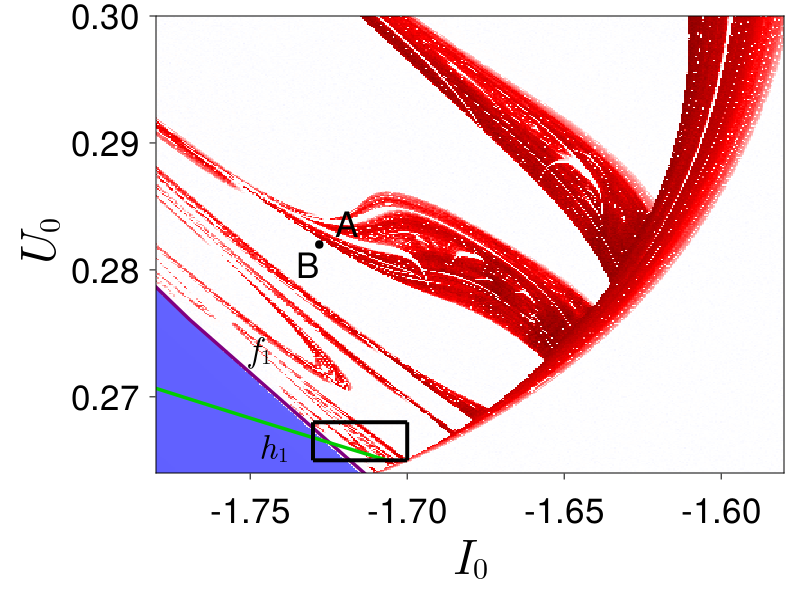

In [36]:
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 3.5
mksize = 12

mx2 = maximum(abs.(Λsc[:, :, index]))
mx1 = maximum(abs.(Λs[:, :, index]))
absmax = maximum([mx2, mx1])
mn, mx =  -absmax, absmax
CairoMakie.activate!()
f = Figure()

I0st, I0ed = 1, 350
U0st, U0ed = 1, 350

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)
            
hm = heatmap!(ax, I0range[I0st:I0ed], U0range[U0st:U0ed], Λs[I0st:I0ed, U0st:U0ed, index], colormap = :seismic, colorrange = (mn, mx))

#absmaxc = maximum(abs.(Λsc[:, :, index]));
mnc, mxc =  -absmax, absmax;
hmc = heatmap!(ax, I0rangec, U0rangec, Λsc[:, :, index], colormap = :seismic, colorrange = (mnc, mxc));

lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
text!(ax, -1.7505, 0.27225, text = L"f_1", fontsize = textsizecurve)

colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[250], u0_hom[250], text = L"h_1", fontsize = textsizecurve, align = (:center, :top), offset = (0, -5))

scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1182463005483, 0.161724273501619, text = "cusp", fontsize = textsize)

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)

#scatter!(ax, -1.3311265433046, 0.182481512082655, label = "ZH", markersize = 8, color = :purple)


#scatter!(ax, −1.723, 0.282, markersize = 12, color = :black)
text!(ax,  −1.723, 0.282, text = "A", fontsize = 35)
scatter!(ax, -1.728, 0.282, markersize = 12, color = :black)
text!(ax, -1.728, 0.282, text = "B", fontsize = 35, align = (:right, :top))

ylims!(0.264, 0.3)
xlims!(-1.78, -1.58)

#axislegend(ax, position = :lt, labelsize = 35)

lines!([-1.7, -1.73], [0.268, 0.268], color = :black, linewidth = 4.0)
lines!([-1.7, -1.73], [0.265, 0.265], color = :black, linewidth = 4.0)
lines!([-1.7, -1.7], [0.265, 0.268], color = :black, linewidth = 4.0)
lines!([-1.73, -1.73], [0.268, 0.265], color = :black, linewidth  = 4.0)

#I0range = range( -1.7, -1.73,  length = 400 )
#U0range = range( 0.268,  0.265, length = 400 )

display(f);

In [37]:
save("C:\\Users\\Alex\\Desktop\\TM model\\space_chaos_hom.eps", f)

CairoMakie.Screen{EPS}


In [33]:
GLMakie.activate!()
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [307]:
U0range[309]

0.2682292263610315

In [308]:
Λs[2, 309, index]

0.0

In [91]:
pathtosave = "C:\\Users\\Alex\\Desktop\\"
filename = "\\test.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
